# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [2]:
### импортируйте нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [4]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
91838,Male,76.0,0,1,ever,23.35,4.8,140,0
75723,Male,48.0,0,0,never,27.32,3.5,159,0
87933,Female,12.0,0,0,No Info,20.33,4.0,158,0
23856,Female,21.0,0,0,not current,21.03,4.8,155,0
58930,Female,22.0,0,0,never,27.32,6.5,140,0


In [5]:
# Выводим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Проверяем на отсутсвующие значения
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Статисктика по категориальным признакам
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [8]:
# Статистика по числовым признакам
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
# Смотрим на уникальные значения столбца gender
gender_counts = df.gender.value_counts()
print(gender_counts)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


Думаю что необходимо уйти от толлерантности и удалить из датасета строки со значением __Other__

In [10]:
# Смотрим на уникальные значения столбца smoking_history
smoking_history_counts = df.smoking_history.value_counts()
print(smoking_history_counts)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


Тут ничего удалять пока не будем, может при анализе будут какие-то зависимости

### Выводы по первичному анализу:
- Средний возраст пациентов 41,8
- Средний уровень __HbA1c__ по датасету 5.52, что говорит о высоком риске диабета у пациентов
- Диабет диагностирован у меньшего числа пациентов
- Среднее значение глюкозы у пациентов находится на верхнем уровне нормы
- Нужно почистить столбец __gender__ от значения __other__
- Датасет полный т.е. нет пропусков


## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [11]:
# Определяем количество дубликатов
num_duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 3854


In [12]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [13]:
# Проверка на отсутствующие значения (еще разок сделаем, нужно же все по заданию пилить)
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Удалим строки со значением __Others__ в столбце __gender__

In [14]:
# Удаляем строки
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
# Пересчитываем индексы
df.reset_index(drop=True, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

**Вывод:**

Датасет подготовлен для анализа при этом были сделаны следующие действия:

- Удалены все дубликаты
- Датасет был проверен на отсутствующие значения
- Из столбца __gender__ было удалено 18 строк со значением __Others__
- Типы данных столбцов не изменялись, так как далее будет работа и с категориальными признаками 

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

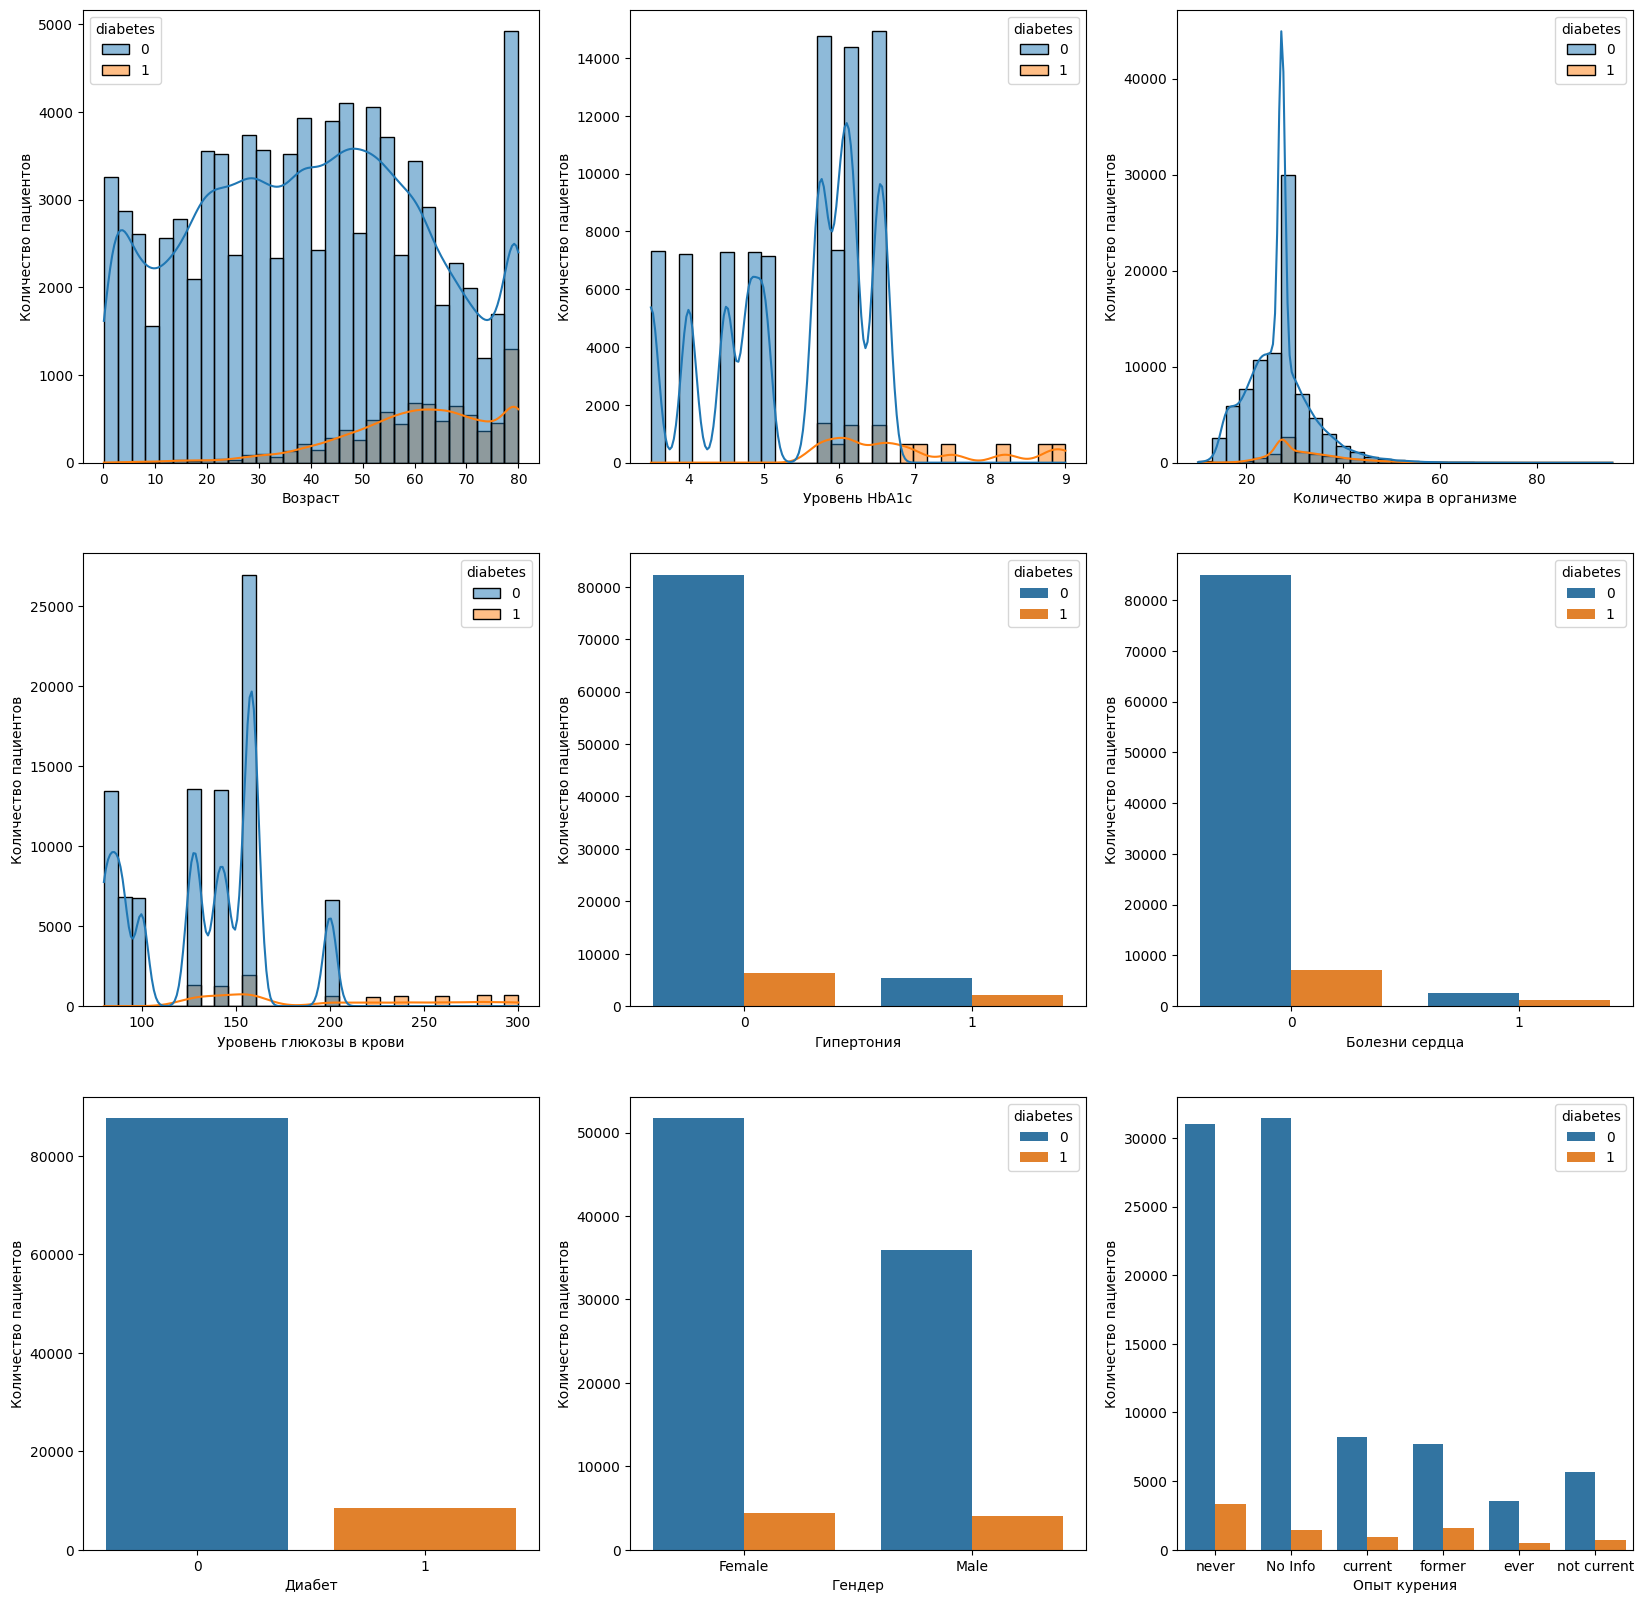

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

sns.histplot(data=df, x='age', bins = 30, kde=True, hue='diabetes', ax=axs[0][0])
axs[0][0].set_xlabel('Возраст')
axs[0][0].set_ylabel('Количество пациентов')

sns.histplot(data=df, x='HbA1c_level', bins = 30, kde=True, hue='diabetes',  ax=axs[0][1])
axs[0][1].set_xlabel('Уровень HbA1c')
axs[0][1].set_ylabel('Количество пациентов')

sns.histplot(data=df, x='bmi', bins = 30, kde=True, hue='diabetes', ax=axs[0][2])
axs[0][2].set_xlabel('Количество жира в организме')
axs[0][2].set_ylabel('Количество пациентов')

sns.histplot(data=df, x='blood_glucose_level', bins = 30, kde=True, hue='diabetes', ax=axs[1][0])
axs[1][0].set_xlabel('Уровень глюкозы в крови')
axs[1][0].set_ylabel('Количество пациентов')

sns.countplot(data=df, x='hypertension', hue='diabetes', ax=axs[1][1])
axs[1][1].set_xlabel('Гипертония')
axs[1][1].set_ylabel('Количество пациентов')

sns.countplot(data=df, x='heart_disease', hue='diabetes', ax=axs[1][2])
axs[1][2].set_xlabel('Болезни сердца')
axs[1][2].set_ylabel('Количество пациентов')

sns.countplot(data=df, x='diabetes', ax=axs[2][0])
axs[2][0].set_xlabel('Диабет')
axs[2][0].set_ylabel('Количество пациентов')

sns.countplot(data=df, x='gender', hue='diabetes', ax=axs[2][1])
axs[2][1].set_xlabel('Гендер')
axs[2][1].set_ylabel('Количество пациентов')

sns.countplot(data=df, x='smoking_history', hue='diabetes', ax=axs[2][2])
axs[2][2].set_xlabel('Опыт курения')
axs[2][2].set_ylabel('Количество пациентов')

plt.show()

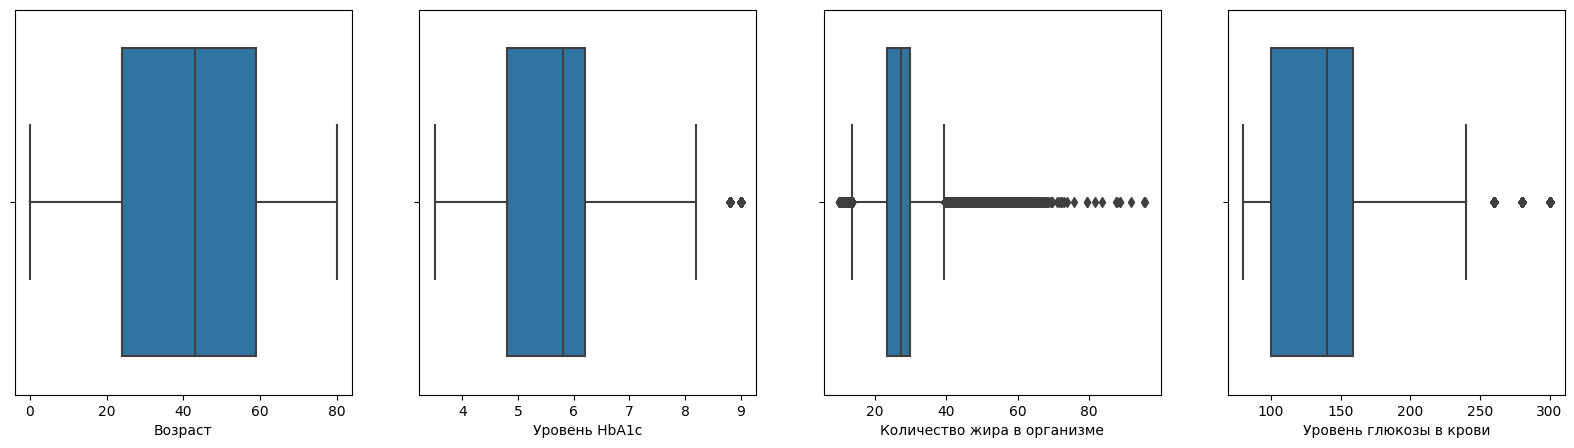

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

sns.boxplot(data=df, x='age', ax=axs[0])
axs[0].set_xlabel('Возраст')

sns.boxplot(data=df, x='HbA1c_level', ax=axs[1])
axs[1].set_xlabel('Уровень HbA1c')

sns.boxplot(data=df, x='bmi', ax=axs[2])
axs[2].set_xlabel('Количество жира в организме')

sns.boxplot(data=df, x='blood_glucose_level', ax=axs[3])
axs[3].set_xlabel('Уровень глюкозы в крови')

plt.show()

In [17]:
#Кодируем категориальные признаки в числовые значения для столбца gender и smoking_history
encoded_valuer, category = df.gender.factorize()
print(f'В столбце "gender" уникальные категории {list(category)} заменены на значения {pd.unique(encoded_valuer)}')
df.gender = pd.factorize(df.gender)[0] # здесь берем нулевой элемент т.к. factorize возвращает значение и категорию

encoded_valuer, category = df.smoking_history.factorize()
print(f'В столбце "smoking_history" уникальные категории {list(category)} заменены на значения {pd.unique(encoded_valuer)}')
df.smoking_history = pd.factorize(df.smoking_history)[0] 
# # Дальше выводим пять случайных значений из DataFrame
df.sample(5)

В столбце "gender" уникальные категории ['Female', 'Male'] заменены на значения [0 1]
В столбце "smoking_history" уникальные категории ['never', 'No Info', 'current', 'former', 'ever', 'not current'] заменены на значения [0 1 2 3 4 5]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
95204,1,68.0,1,0,0,32.31,4.8,130,0
86902,1,3.0,0,0,0,15.33,6.6,100,0
85199,1,3.0,0,0,1,21.89,4.0,85,0
74266,1,8.0,0,0,1,16.32,4.5,155,0
31687,0,14.0,0,0,1,31.73,6.0,130,0


<Axes: >

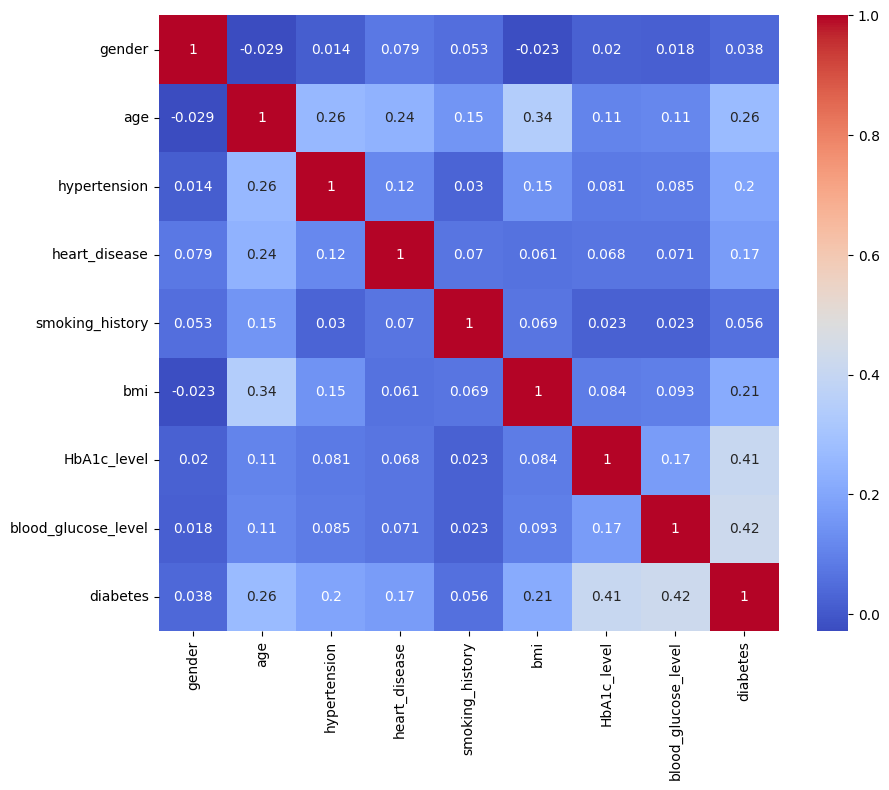

In [18]:
# Вычисление матрицы корреляции
corr_matrix = df.corr()
# Вывод матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

**Вывод:**

Значительной корреляции между признаками не выявлено. Наиболее высокая корреляция с диабетом у параметра **уровень глюкозы в крови**


## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их. **(P.S. сделал выше)**

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

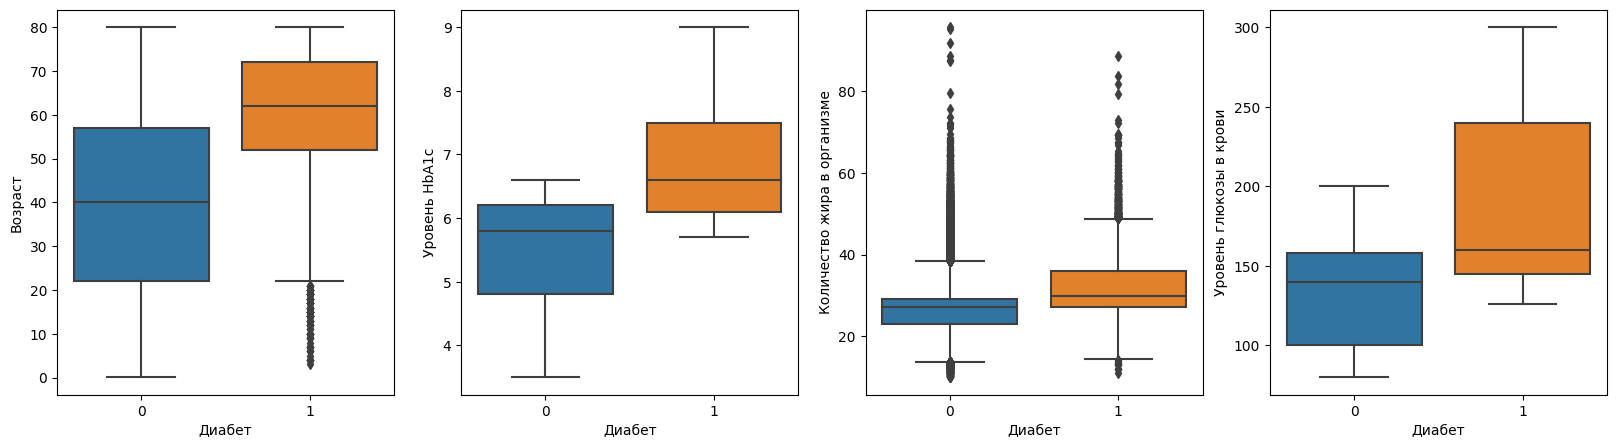

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

sns.boxplot(data=df, x ='diabetes', y='age', ax=axs[0])
axs[0].set_ylabel('Возраст')
axs[0].set_xlabel('Диабет')

sns.boxplot(data=df, x ='diabetes', y='HbA1c_level', ax=axs[1])
axs[1].set_ylabel('Уровень HbA1c')
axs[1].set_xlabel('Диабет')

sns.boxplot(data=df, x ='diabetes', y='bmi', ax=axs[2])
axs[2].set_ylabel('Количество жира в организме')
axs[2].set_xlabel('Диабет')

sns.boxplot(data=df, x ='diabetes', y='blood_glucose_level', ax=axs[3])
axs[3].set_ylabel('Уровень глюкозы в крови')
axs[3].set_xlabel('Диабет')

plt.show()


**Вывод:**

На основе анализа данных можно сделать вывод о том, что есть небольшая зависимость (корреляция) между наличием диабета и следующих параметров:

- Возраст
- Уровень HbA1c
- Уровень глюкозы в крови
- Количество жира в организме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96128 entries, 0 to 96127
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  int64  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int64  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.6 MB


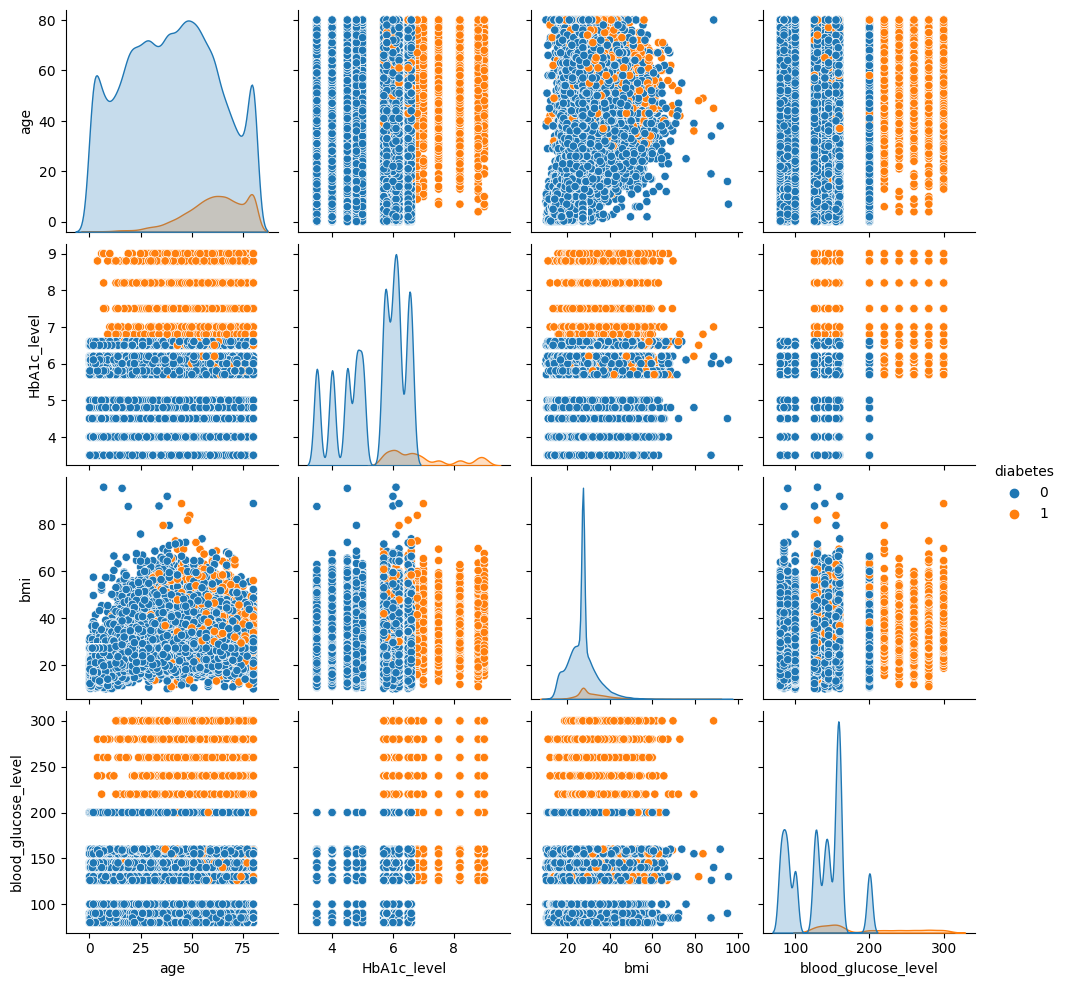

In [29]:
df.info()
# Построение парных графиков
sns.pairplot(df[['age','HbA1c_level','bmi','blood_glucose_level','diabetes']], hue='diabetes')